# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [39]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 599


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()
        
        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rincon
Processing Record 2 of Set 1 | albany
Processing Record 3 of Set 1 | upernavik
Processing Record 4 of Set 1 | lasa
Processing Record 5 of Set 1 | barrow
Processing Record 6 of Set 1 | tsihombe
City not found. Skipping...
Processing Record 7 of Set 1 | carutapera
Processing Record 8 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 9 of Set 1 | coffs harbour
Processing Record 10 of Set 1 | sayyan
Processing Record 11 of Set 1 | vao
Processing Record 12 of Set 1 | tasiilaq
Processing Record 13 of Set 1 | ushuaia
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | ayan
Processing Record 16 of Set 1 | gornopravdinsk
Processing Record 17 of Set 1 | viedma
Processing Record 18 of Set 1 | rikitea
Processing Record 19 of Set 1 | rocha
Processing Record 20 of Set 1 | nikolskoye
Processing Record 21 of Set 1 | kodinar
Processing Record 22 of Set 1 | busselton


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          550
Lat           550
Lng           550
Max Temp      550
Humidity      550
Cloudiness    550
Wind Speed    550
Country       550
Date          550
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rincon,32.2960,-81.2354,18.98,65,75,4.63,US,1675813878
1,albany,42.6001,-73.9662,2.36,70,100,0.45,US,1675813611
2,upernavik,72.7868,-56.1549,-29.67,98,73,1.32,GL,1675813878
3,lasa,46.6166,10.7002,-4.43,76,8,0.35,IT,1675813879
4,barrow,71.2906,-156.7887,-17.99,78,100,4.12,US,1675813676


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rincon,32.2960,-81.2354,18.98,65,75,4.63,US,1675813878
1,albany,42.6001,-73.9662,2.36,70,100,0.45,US,1675813611
2,upernavik,72.7868,-56.1549,-29.67,98,73,1.32,GL,1675813878
3,lasa,46.6166,10.7002,-4.43,76,8,0.35,IT,1675813879
4,barrow,71.2906,-156.7887,-17.99,78,100,4.12,US,1675813676


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

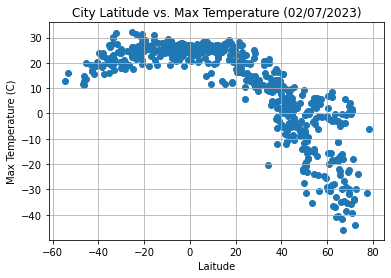

In [8]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'])

# Incorporate the other graph properties
plt.xlabel('Laitude')
plt.ylabel('Max Temperature (C)')
plt.title('City Latitude vs. Max Temperature (02/07/2023)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

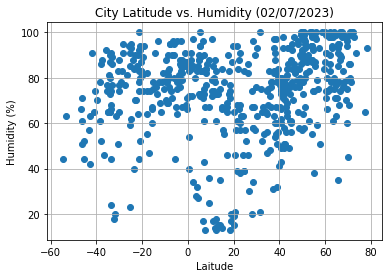

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'])

# Incorporate the other graph properties
plt.xlabel('Laitude')
plt.ylabel('Humidity (%)')
plt.title('City Latitude vs. Humidity (02/07/2023)')
plt.grid()
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

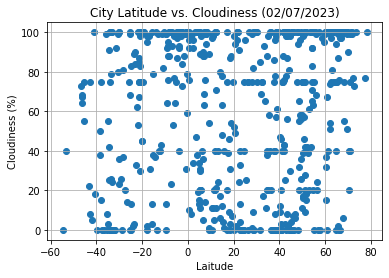

In [13]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'])

# Incorporate the other graph properties
plt.xlabel('Laitude')
plt.ylabel('Cloudiness (%)')
plt.title('City Latitude vs. Cloudiness (02/07/2023)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

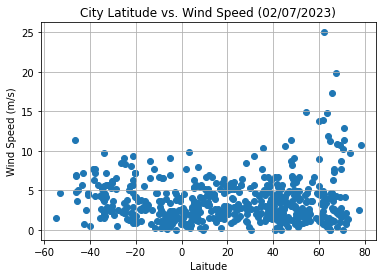

In [14]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'])

# Incorporate the other graph properties
plt.xlabel('Laitude')
plt.ylabel('Wind Speed (m/s)')
plt.title('City Latitude vs. Wind Speed (02/07/2023)')
plt.grid()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [47]:
# Define a function to create Linear Regression plots
def regression(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    print(f"The r-squared is: {rvalue**2}")
    plt.scatter(x, y)
    plt.plot(x,regress_values,"r-")
    return line_eq

In [29]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,rincon,32.2960,-81.2354,18.98,65,75,4.63,US,1675813878
1,albany,42.6001,-73.9662,2.36,70,100,0.45,US,1675813611
2,upernavik,72.7868,-56.1549,-29.67,98,73,1.32,GL,1675813878
3,lasa,46.6166,10.7002,-4.43,76,8,0.35,IT,1675813879
4,barrow,71.2906,-156.7887,-17.99,78,100,4.12,US,1675813676


In [30]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
5,carutapera,-1.1950,-46.0200,24.45,91,99,2.53,BR,1675813871
6,coffs harbour,-30.3000,153.1333,25.63,65,100,2.57,AU,1675813884
8,vao,-22.6667,167.4833,26.59,70,33,5.53,NC,1675813887
10,ushuaia,-54.8000,-68.3000,12.81,44,0,1.54,AR,1675813888
11,bredasdorp,-34.5322,20.0403,19.29,75,91,3.98,ZA,1675813746


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.7293486074738486


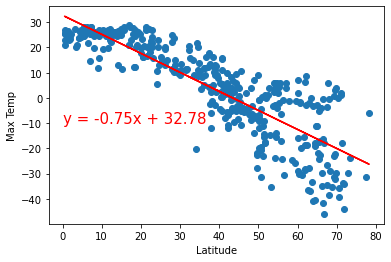

In [51]:
# Linear regression on Northern Hemisphere
line = regression(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
plt.annotate(line,(0,-10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-squared is: 0.2923748419729478


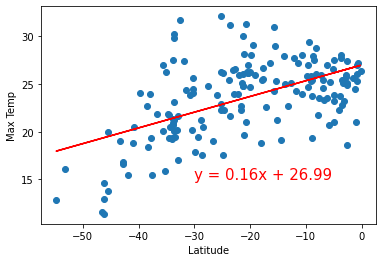

In [49]:
# Linear regression on Southern Hemisphere
line = regression(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
plt.annotate(line,(-30,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.12253997475501688


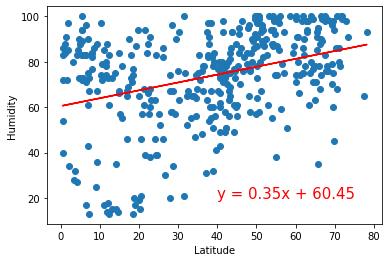

In [53]:
# Northern Hemisphere
line = regression(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
plt.annotate(line,(40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-squared is: 0.1167069901094103


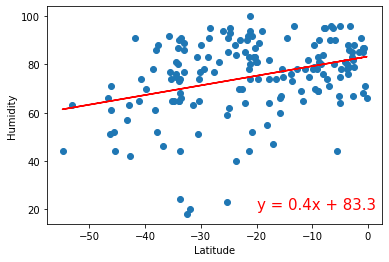

In [55]:
# Southern Hemisphere
line = regression(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
plt.annotate(line,(-20,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.02904419465208531


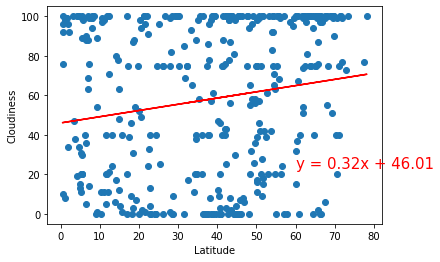

In [58]:
# Northern Hemisphere
line = regression(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
plt.annotate(line,(60,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-squared is: 0.1787282226589415


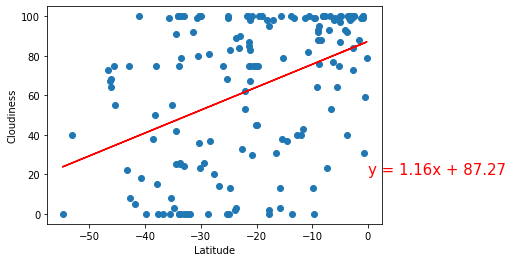

In [60]:
# Southern Hemisphere
line = regression(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
plt.annotate(line,(0,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.027842870072135553


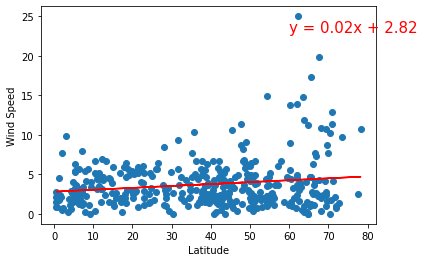

In [62]:
# Northern Hemisphere
line = regression(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
plt.annotate(line,(60,23),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-squared is: 0.10438391923063045


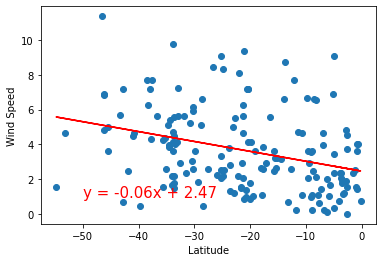

In [64]:
# Southern Hemisphere
line = regression(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
plt.annotate(line,(-50,1),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

**Discussion about the linear relationship:** YOUR RESPONSE HERE